In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
# pd.read_csv(file,engine='python', error_bad_lines=False) 

# Reading the data set:

In [3]:
df = pd.read_csv('blogtext.csv',engine='python',error_bad_lines=False)

Skipping line 16844: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 19370: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 31753: field larger than field limit (131072)
Skipping line 33676: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 65976: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 116130: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 127080: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 

In [4]:
df.shape

(681241, 7)

# Sample from the population:

In [5]:
df_sample = df.sample(frac = .20)

In [6]:
df_sample.shape

(136248, 7)

In [7]:
df_sample.head()

,id,gender,age,topic,sign,date,text
346673,665500,male,35,indUnk,Aries,"06,August,2003",Woo Hoo! I think I fixed the Nor...
510664,1404145,male,17,Religion,Cancer,"01,April,2004","This is a repost, I accidentally po..."
296097,1474573,female,23,Student,Leo,"11,December,2003",If this requires too much bra...
6898,883178,male,36,Fashion,Aries,"18,February,2003","PB, Do I have to show you what I'm..."
181875,3776060,male,16,Student,Capricorn,"30,July,2004",YOs..........hi ppl ....ong time no ch...


In [8]:
df_sample.reset_index(drop=True,inplace=True)

In [9]:
df_sample.head()

,id,gender,age,topic,sign,date,text
0,665500,male,35,indUnk,Aries,"06,August,2003",Woo Hoo! I think I fixed the Nor...
1,1404145,male,17,Religion,Cancer,"01,April,2004","This is a repost, I accidentally po..."
2,1474573,female,23,Student,Leo,"11,December,2003",If this requires too much bra...
3,883178,male,36,Fashion,Aries,"18,February,2003","PB, Do I have to show you what I'm..."
4,3776060,male,16,Student,Capricorn,"30,July,2004",YOs..........hi ppl ....ong time no ch...


# Cleaning the Text:

In [11]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [15]:
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    words = [w for w in words if w not in stopword_list]
    return " ".join(words)	
  except:
    return ""

In [16]:
def porter_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [17]:
df_sample['clean_text'] = df_sample['text'].apply(clean_str)
df_sample['clean_text'].head()

0    woo hoo think fixed norton problem yay decided...
1    repost accidentally posted earlier post mine a...
2    requires much brain power read anyway fun poem...
3                     pb show workin please advise duf
4    yos hi ppl ong time no chat u guys sorry no up...
Name: clean_text, dtype: object

In [18]:
df_sample['clean_text1'] =  df_sample['clean_text'].apply(porter_stemmer)

In [19]:
df_sample.head()

,id,gender,age,topic,sign,date,text,clean_text,clean_text1
0,665500,male,35,indUnk,Aries,"06,August,2003",Woo Hoo! I think I fixed the Nor...,woo hoo think fixed norton problem yay decided...,woo hoo think fix norton problem yay decid tri...
1,1404145,male,17,Religion,Cancer,"01,April,2004","This is a repost, I accidentally po...",repost accidentally posted earlier post mine a...,repost accident post earlier post mine appear ...
2,1474573,female,23,Student,Leo,"11,December,2003",If this requires too much bra...,requires much brain power read anyway fun poem...,requir much brain power read anyway fun poem r...
3,883178,male,36,Fashion,Aries,"18,February,2003","PB, Do I have to show you what I'm...",pb show workin please advise duf,pb show workin pleas advis duf
4,3776060,male,16,Student,Capricorn,"30,July,2004",YOs..........hi ppl ....ong time no ch...,yos hi ppl ong time no chat u guys sorry no up...,yo hi ppl ong time no chat u guy sorri no upda...


In [20]:
df_sample.head(2)

,id,gender,age,topic,sign,date,text,clean_text,clean_text1
0,665500,male,35,indUnk,Aries,"06,August,2003",Woo Hoo! I think I fixed the Nor...,woo hoo think fixed norton problem yay decided...,woo hoo think fix norton problem yay decid tri...
1,1404145,male,17,Religion,Cancer,"01,April,2004","This is a repost, I accidentally po...",repost accidentally posted earlier post mine a...,repost accident post earlier post mine appear ...


# merging the Target variables:

In [21]:
def merge(x1,x2,x3,x4):
  x = []
  for i,j in zip(zip(x1,x2),zip(x3,x4)):
    x.append(list(np.hstack([i,j])))
  return x

In [22]:
df_sample['labels'] = merge(df_sample['gender'],df_sample['age'],df_sample['topic'],df_sample['sign'])

In [23]:
df_sample['labels'].head()

0         [male, 35, indUnk, Aries]
1      [male, 17, Religion, Cancer]
2        [female, 23, Student, Leo]
3        [male, 36, Fashion, Aries]
4    [male, 16, Student, Capricorn]
Name: labels, dtype: object

In [24]:
df_sample.head()

,id,gender,age,topic,sign,date,text,clean_text,clean_text1,labels
0,665500,male,35,indUnk,Aries,"06,August,2003",Woo Hoo! I think I fixed the Nor...,woo hoo think fixed norton problem yay decided...,woo hoo think fix norton problem yay decid tri...,"[male, 35, indUnk, Aries]"
1,1404145,male,17,Religion,Cancer,"01,April,2004","This is a repost, I accidentally po...",repost accidentally posted earlier post mine a...,repost accident post earlier post mine appear ...,"[male, 17, Religion, Cancer]"
2,1474573,female,23,Student,Leo,"11,December,2003",If this requires too much bra...,requires much brain power read anyway fun poem...,requir much brain power read anyway fun poem r...,"[female, 23, Student, Leo]"
3,883178,male,36,Fashion,Aries,"18,February,2003","PB, Do I have to show you what I'm...",pb show workin please advise duf,pb show workin pleas advis duf,"[male, 36, Fashion, Aries]"
4,3776060,male,16,Student,Capricorn,"30,July,2004",YOs..........hi ppl ....ong time no ch...,yos hi ppl ong time no chat u guys sorry no up...,yo hi ppl ong time no chat u guy sorri no upda...,"[male, 16, Student, Capricorn]"


In [25]:
df1  = df_sample[['clean_text1','labels']]

In [26]:
df1.head(20)

,clean_text1,labels
0,woo hoo think fix norton problem yay decid tri...,"[male, 35, indUnk, Aries]"
1,repost accident post earlier post mine appear ...,"[male, 17, Religion, Cancer]"
2,requir much brain power read anyway fun poem r...,"[female, 23, Student, Leo]"
3,pb show workin pleas advis duf,"[male, 36, Fashion, Aries]"
4,yo hi ppl ong time no chat u guy sorri no upda...,"[male, 16, Student, Capricorn]"
5,yesterday pretti busi day henc post blog till ...,"[male, 16, Student, Gemini]"
6,call fat freak well know hate give leav hell a...,"[female, 15, indUnk, Taurus]"
7,mahatma ghandi wrote seaven sin world wealth w...,"[female, 33, LawEnforcement-Security, Gemini]"
8,mike sound like fun,"[female, 27, indUnk, Capricorn]"
9,alway thought would forev never thought end he...,"[female, 24, Communications-Media, Aries]"


# Seperating the data into training set and testing set

In [27]:
X = df1['clean_text1']
y = df1.labels

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.10)

In [222]:
X_train.shape,X_test.shape

((122623,), (13625,))

In [223]:
y_train.shape,y_test.shape

((122623,), (13625,))

# Bag of words:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [70]:
cv_dtm = CountVectorizer(ngram_range=(1,2),max_df=.95)

In [71]:
cv_dtm.fit(X_train)
X_train_dtm =cv_dtm.transform(X_train)

In [33]:
X_train_dtm

<122623x4918134 sparse matrix of type '<class 'numpy.int64'>'
	with 20730659 stored elements in Compressed Sparse Row format>

# 10 Rows 9 rows and coluns array:

In [62]:
print(X_train_dtm[1:10,1:10].toarray())

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [39]:
X_test_dtm = cv_dtm.transform(X_test)
X_test_dtm

<13625x4918134 sparse matrix of type '<class 'numpy.int64'>'
	with 1951267 stored elements in Compressed Sparse Row format>

In [63]:
print(X_test_dtm[1:10,1:10].toarray())

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


# TF - IDF (Term Frequency and Inverse Document Frequency)

In [200]:
tfidf = TfidfVectorizer(ngram_range=(2,2),max_df=.60)

In [201]:
tfidf.fit(X_train)
X_train_tfidf =tfidf.transform(X_train)

In [202]:
X_test_tfidf = tfidf.transform(X_test)

In [203]:
X_train_tfidf[1:10,:10].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [204]:
features = tfidf.get_feature_names()

In [205]:
features[:20]

['aa aaa',
 'aa abe',
 'aa alanon',
 'aa alkalin',
 'aa although',
 'aa ancient',
 'aa ba',
 'aa batteri',
 'aa bb',
 'aa bdaee',
 'aa bhi',
 'aa bhii',
 'aa bra',
 'aa brown',
 'aa bummer',
 'aa canada',
 'aa certain',
 'aa come',
 'aa compar',
 'aa confess']

# Frequency of words(Features)

In [108]:
from nltk.probability import FreqDist
from scipy.stats import itemfreq
from nltk.tokenize import word_tokenize

In [137]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [143]:
words_token = []
for i in X_train:
    words = word_tokenize(i)
    words_token.extend(words)

In [148]:
fdist = FreqDist(words_token)

In [153]:
fdist.most_common()[:20]

[('not', 127164),
 ('like', 107445),
 ('go', 100158),
 ('get', 91861),
 ('nbsp', 90501),
 ('one', 87169),
 ('time', 78811),
 ('know', 71965),
 ('urllink', 69052),
 ('think', 65097),
 ('realli', 59638),
 ('day', 59585),
 ('no', 57577),
 ('thing', 56607),
 ('want', 54289),
 ('would', 53904),
 ('well', 53625),
 ('good', 51512),
 ('got', 51434),
 ('peopl', 51236)]

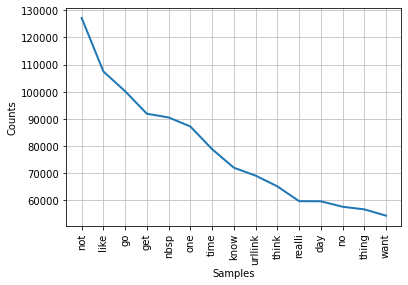

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [157]:
fdist.plot(15)

# Convert the target varibles into binary format:

In [159]:
from sklearn.preprocessing import MultiLabelBinarizer

In [160]:
 mlb = MultiLabelBinarizer()
y_train_array = mlb.fit_transform(y_train)

In [180]:
print(len(mlb.classes_))

80


In [165]:
y_test_array = mlb.fit_transform(y_test)

# Model building:

In [169]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [170]:
clf = LogisticRegression(solver='lbfgs')

In [172]:
clf = OneVsRestClassifier(clf)

In [174]:
clf.fit(X_train_dtm,y_train_array)

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

OneVsRestClassifier(estimator=LogisticRegression())

# Performance evaluations

In [175]:
from sklearn import metrics

In [177]:
y_pred_dtm = clf.predict(X_test_dtm)

# Accuracy :

In [179]:
metrics.accuracy_score(y_test_array,y_pred_dtm)

0.023779816513761466

In [186]:
print(metrics.classification_report(y_test_array,y_pred_dtm))

              precision    recall  f1-score   support

           0       0.61      0.09      0.16       242
           1       0.56      0.14      0.22       578
           2       0.48      0.10      0.16       842
           3       0.51      0.17      0.25      1490
           4       0.51      0.18      0.27      1594
           5       0.43      0.08      0.14      1514
           6       0.43      0.08      0.14      1549
           7       0.41      0.08      0.13      1279
           8       0.41      0.05      0.10      1087
           9       0.36      0.05      0.09       944
          10       0.37      0.05      0.09       353
          11       0.67      0.13      0.22       430
          12       0.60      0.09      0.15       349
          13       0.40      0.06      0.10       282
          14       0.67      0.06      0.11       201
          15       0.50      0.05      0.09       141
          16       0.33      0.03      0.06        96
          17       0.83    

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Precision score:

In [211]:
metrics.precision_score(y_test_array,y_pred_dtm,average='micro')

0.5769168422758956

# Recall score:

In [212]:
metrics.recall_score(y_test_array,y_pred_dtm,average='micro')

0.26121100917431195

# F1 score

In [213]:
metrics.precision_recall_fscore_support(y_test_array,y_pred_dtm,average='micro')

(0.5769168422758956, 0.26121100917431195, 0.3596039203799131, None)

# F1 score:

# MICRO average 

In [188]:
metrics.f1_score(y_test_array,y_pred_dtm,average='micro')

0.3596039203799131

# macro average:

In [189]:
metrics.f1_score(y_test_array,y_pred_dtm,average='macro')

0.11375501131042738

# Weighted:

In [192]:
metrics.f1_score(y_test_array,y_pred_dtm,average='weighted')

0.2992843524569357

# Samples:

In [194]:
metrics.f1_score(y_test_array,y_pred_dtm,average='samples')

0.34364229035939775

# 10th print the actual labels and predicted labels:

In [ ]:
# Actual:

In [220]:
print(y_test_array[:5])

[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 1 0 0]]


In [ ]:
# Predicted:

In [221]:
print(y_pred_dtm[:5])

[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
  1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1]]


# Tf Idf with less amount of data 

In [176]:
clf1 = OneVsRestClassifier(clf)

In [206]:
clf1.fit(X_train_tfidf,y_train_array)

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

OneVsRestClassifier(estimator=OneVsRestClassifier(estimator=LogisticRegression()))

In [209]:
y_pred_tfidf = clf1.predict(X_test_tfidf)

In [210]:
metrics.accuracy_score(y_test_array,y_pred_tfidf)

0.003376146788990826

In [214]:
from sklearn.naive_bayes import MultinomialNB

In [184]:
!pip install gensim